# EDA for the default risk dataset

In this notebook we conduct an analysis to better understand the default risk dataset. The goal is to understand what data is available, and what we can use as features for a classification model.
Note: to run this analysis notebook you need numpy, pandas, scipy, scikit-learn, pyarrow, and plotnine installed. You can install these in a conda environment using the conda package manager, or from command line:

- conda install -y numpy pandas scikit-learn scipy
- conda install -c conda-forge plotnine

## Read and clean data

In [287]:
pip install plotnine

In [288]:
import numpy as np
import pandas as pd
from plotnine import * # generally not a good thing to do to import everything from a package. However it's ok for visualization purposes in an analysis.
import os
import scipy

In [289]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [290]:
os.getcwd()

'c:\\Users\\Eigenaar\\Documents\\AI\\DDB_AI-main\\credit_risk_case_study'

In [291]:
#os.listdir(os.path.join('..', 'dataset1')) # independent of the platform (unix, windows)

In [292]:
#credit_card_data_path = os.path.join("..", "dataset1", "funda_ai_dataset_v3.txt")
#credit_card_df = pd.read_csv(credit_card_data_path, sep='\t')

In [293]:
#print("There are {} rows and {} columns in the dataset".format(credit_card_df.shape[0], credit_card_df.shape[1]))

In [294]:
df = pd.read_csv('funda_ai_dataset_v3.1.csv', delimiter=',')

In [295]:
df.head()
df.tail()

,Unnamed: 0,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1
0,0,"Een heerlijk, lichte middenwoning gelegen in...",115.0,166.0,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,2021-11-24,4 weken,Heiloo,1851SK,375.000,6,5.0,28,1962
1,1,Instapklare en ruime twee-onder-een-kapwoning...,130.0,243.0,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,2021-07-22,12 dagen,Vlijmen,5251SG,425.000,5,4.0,12,1992
2,2,Mooie en ruime helft van een dubbel woonhui...,124.0,245.0,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,2021-11-29,3 maanden,Dinxperlo,7091TB,299.000,5,4.0,104,1981
3,3,Geheel opgeknapte hoekwoning met dakopbouw e...,92.0,257.0,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,2021-09-14,2 weken,Hellevoetsluis,3222CA,295.000,5,4.0,18,1961
4,4,Deze ruime en goed onderhouden eindwoning m...,126.0,131.0,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,2021-12-20,3 weken,Rotterdam,3068GN,345.000,5,4.0,24,1983


,Unnamed: 0,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1
174955,174955,Aan de burgemeester Vogelaarstraat in Kruini...,88.0,266.0,1956,Tuin,"Eengezinswoning, vrijstaande woning",F,1 badkamer en 1 apart toilet,45,2020-11-02,2020-12-15,6 weken,Kruiningen,4416BP,265.000,5,3.0,43,1956
174956,174956,KEURIG ONDERHOUDEN TUSSENWONING MET ZONNIG G...,103.0,93.0,1984,Tuin,"Eengezinswoning, tussenwoning",B,1 badkamer en 1 apart toilet,30,2020-11-10,2021-01-01,7 weken,Delft,2622GH,329.500,4,3.0,52,1984
174957,174957,"Op een hele fijne plek, centraal in Maaslan...",109.0,156.0,1968,Achtertuin,"Eengezinswoning, tussenwoning",C,1 badkamer en 1 apart toilet,49,2020-11-03,2020-11-23,2 weken,Maasland,3155VD,367.000,5,4.0,20,1968
174958,174958,"** Englisch text below ** , ,U bent van ha...",234.0,455.0,1960,Tuin,"Villa, vrijstaande woning (drive-in woning)",F,2 badkamers en 2 aparte toiletten,53,2020-11-03,2020-12-04,4 weken,Diemen,1111EW,1.000.000,5,4.0,31,1960
174959,174959,Vanwege de grote belangstelling voor deze w...,118.0,200.0,1981,Tuin,"Eengezinswoning, hoekwoning",C,1 badkamer en 1 apart toilet,55,2020-11-05,2020-11-25,2 weken,Hellevoetsluis,3224PN,bij,5,4.0,20,1981


In [296]:
df.drop_duplicates(subset=['Unnamed: 0']).shape[0] == df.shape[0]

True

In [297]:
#rename columns
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [298]:
df = df.set_index("id")
df.head()

,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1
id,,,,,,,,,,,,,,,,,,,
0,"Een heerlijk, lichte middenwoning gelegen in...",115.0,166.0,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,2021-11-24,4 weken,Heiloo,1851SK,375.000,6,5.0,28,1962
1,Instapklare en ruime twee-onder-een-kapwoning...,130.0,243.0,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,2021-07-22,12 dagen,Vlijmen,5251SG,425.000,5,4.0,12,1992
2,Mooie en ruime helft van een dubbel woonhui...,124.0,245.0,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,2021-11-29,3 maanden,Dinxperlo,7091TB,299.000,5,4.0,104,1981
3,Geheel opgeknapte hoekwoning met dakopbouw e...,92.0,257.0,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,2021-09-14,2 weken,Hellevoetsluis,3222CA,295.000,5,4.0,18,1961
4,Deze ruime en goed onderhouden eindwoning m...,126.0,131.0,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,2021-12-20,3 weken,Rotterdam,3068GN,345.000,5,4.0,24,1983


In [299]:
#count nans in entire dataset
df.isnull().sum().sum()

32323

In [300]:
#count nans in specifik column
#df['house_description'].isnull().sum()
#df['living_area_surface'].isnull().sum()
#df['property_surface'].isnull().sum()
#df['construction_year'].isnull().sum()
#df['garden'].isnull().sum() #keep this one
#df['type_house'].isnull().sum()
#df['energy_label'].isnull().sum()
#df['aantalfotos'].isnull().sum()
#df['publication_date'].isnull().sum()
#df['date_of_signiture'].isnull().sum()
#df['sell_time'].isnull().sum()
#df['plaats'].isnull().sum()
#df['postcode'].isnull().sum()
#df['ask_price'].isnull().sum()
#df['number_room'].isnull().sum()
#df['bedrooms'].isnull().sum()
#df['sell_time_cal'].isnull().sum()
#df['construction_year_1'].isnull().sum()

In [301]:
#drop nans
df.dropna(subset = ["living_area_surface"], inplace=True)
df.dropna(subset = ["property_surface"], inplace=True)
df.dropna(subset = ["aantalfotos"], inplace=True)
df.dropna(subset = ["plaats"], inplace=True)
df.dropna(subset = ["bedrooms"], inplace=True)

In [302]:
#make column aantalfotos and ask_price float or int 
#Split postcode
new = df['ask_price'].str.split(".", n = 2, expand = True)
  
# making separate first name column from new data frame
df["a"]= new[0]
  
# making separate last name column from new data frame
df["b"]= new[1]

df['c']= new[2]
  
# Dropping old Name columns

In [303]:
df['asking_price'] = df["a"].astype(str) + df["b"].astype(str) + df["c"].astype(str)

In [304]:
df['asking_price'] = df['asking_price'].str.strip('None')

In [305]:
#del tekst in asking prce
df['asking_price'] = df['asking_price'].str.replace('bij', '0')
df['asking_price'] = df['asking_price'].str.replace('p', '0')

In [306]:
del df['a']
del df['b']
del df['c']

In [307]:
df['asking_price'] = df['asking_price'].astype(int)

In [308]:
df['construction_year_1'] = df['construction_year_1'].str.strip('Na ')

In [309]:
#construction_year into ing
df['construction_year_1'] = df['construction_year_1'].astype(int)

In [310]:
# colums to integer type
for i in [x for x in df.columns if x not in ['house_description', 'construction_year', 'garden', 'type_house', 'energy_label', 'aantalfotos', 'number_bathrooms', 'publication_date', 'date_of_signiture', 'sell_time', 'plaats', 'postcode', 'ask_price', 'construction_year_1'] ]:
    df[i]= df[i].astype(int)

In [311]:
df.dtypes

house_description      object
living_area_surface     int32
property_surface        int32
construction_year      object
garden                 object
type_house             object
energy_label           object
number_bathrooms       object
aantalfotos            object
publication_date       object
date_of_signiture      object
sell_time              object
plaats                 object
postcode               object
ask_price              object
number_room             int32
bedrooms                int32
sell_time_cal           int32
construction_year_1     int32
asking_price            int32
dtype: object

In [312]:
df[[ 'living_area_surface', 'property_surface', 'number_room', 'bedrooms', 'sell_time_cal', 'construction_year_1', 'asking_price']].describe()

,living_area_surface,property_surface,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price
count,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,1.697170e+05
mean,120.315708,170.195702,4.690379,3.254712,42.673786,1970.552885,4.011160e+05
std,51.455494,187.411793,1.600285,1.195171,96.430241,37.107286,2.421808e+05
min,1.000000,1.000000,1.000000,1.000000,0.000000,1005.000000,0.000000e+00
25%,89.000000,3.000000,4.000000,2.000000,16.000000,1955.000000,2.600000e+05
50%,113.000000,140.000000,5.000000,3.000000,22.000000,1975.000000,3.450000e+05
75%,138.000000,241.000000,5.000000,4.000000,34.000000,1997.000000,4.690000e+05
max,937.000000,999.000000,40.000000,28.000000,5106.000000,2024.000000,7.800000e+06


In [313]:
df.describe()

,living_area_surface,property_surface,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price
count,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,169717.000000,1.697170e+05
mean,120.315708,170.195702,4.690379,3.254712,42.673786,1970.552885,4.011160e+05
std,51.455494,187.411793,1.600285,1.195171,96.430241,37.107286,2.421808e+05
min,1.000000,1.000000,1.000000,1.000000,0.000000,1005.000000,0.000000e+00
25%,89.000000,3.000000,4.000000,2.000000,16.000000,1955.000000,2.600000e+05
50%,113.000000,140.000000,5.000000,3.000000,22.000000,1975.000000,3.450000e+05
75%,138.000000,241.000000,5.000000,4.000000,34.000000,1997.000000,4.690000e+05
max,937.000000,999.000000,40.000000,28.000000,5106.000000,2024.000000,7.800000e+06


In [314]:
n_nulls = df.loc[lambda x: x.isnull().any(axis=1)].shape 
print(f"There are {n_nulls[0]} rows with null values in this dataset") 

#the nans are from garden

There are 22298 rows with null values in this dataset


In [315]:
#replace garden nan with geen tuin
df['garden'] = df['garden'].fillna('Geen tuin')

There are no null values in this dataset. For a real-life dataset (such as the the energy consumption forecast that we will discuss later), this is rarely the case. There are a couple of things that are possible if there are null values:
- drop the column if there's too many missing values
- impute the missing values otherwise. For a categorical variable you can use for instance the mode, while for a numeric variable you can use e.g. the mean. However it's always crucial to first understand your data and on that basis determine if the imputation makes sense.
- for instance, in the Funda dataset the **perceeloppervlakte** is missing from apartments. That's because for apartments perceeloppervlakte is the same as the woonoppervlakte. Hence in this case it would make more sense to just impute the perceeloppervlakte column with the value of the woonoppervlakte if the house is an apartment.

In [316]:
# let's rename the target and pay_0
#df = df.rename(columns={'default payment next month': 'default',
#'pay_0': 'pay_1'
#})
#df.columns

I am going to create a class and instance to rename column values on the fly to human-readable format.

In [317]:
#unique column check

#df['house_description'].unique()
#df['living_area_surface'].unique()
#df['property_surface'].unique()
#df['construction_year'].unique()
#df['garden'].unique()
df['type_house'].unique()
#df['energy_label'].unique()
#df['aantalfotos'].unique()
#df['publication_date'].unique()
#df['date_of_signiture'].unique()
#df['sell_time'].unique()
#df['plaats'].unique()
#df['postcode'].unique()
#df['ask_price'].unique()
#df['asking_price'].unique()
#df['number_room'].unique()
#df['bedrooms'].unique()
#df['sell_time_cal'].unique()
#df['construction_year_1'].unique()

array(['Eengezinswoning, tussenwoning',
       'Eengezinswoning, 2-onder-1-kapwoning',
       'Eengezinswoning, hoekwoning', 'Eengezinswoning, eindwoning',
       'Herenhuis, tussenwoning', 'Bovenwoning (appartement)',
       'Portiekflat (appartement)',
       'Eengezinswoning, tussenwoning (drive-in woning)',
       'Eengezinswoning, eindwoning (hofjeswoning)', 'Portiekflat',
       'Maisonnette', 'Woonboerderij, vrijstaande woning',
       'Galerijflat (appartement)', 'Eengezinswoning, vrijstaande woning',
       'Eengezinswoning, geschakelde 2-onder-1-kapwoning', 'Galerijflat',
       'Bovenwoning (dubbel bovenhuis)', 'Benedenwoning',
       'Maisonnette (appartement)', 'Villa, vrijstaande woning',
       'Penthouse (appartement)', 'Bungalow, vrijstaande woning',
       'Woonboerderij, vrijstaande woning (bedrijfs- of dienstwoning)',
       'Tussenverdieping (appartement)', 'Portiekwoning (appartement)',
       'Eengezinswoning, vrijstaande woning (dijkwoning)',
       'Eengezinswo

In [318]:
#replace garden wrong values
df['garden'] = df['garden'].str.replace('Jaarlijkse vergadering', 'Geen tuin')
df['garden'] = df['garden'].str.replace('Plaats', 'Geen tuin')
df['garden'] = df['garden'].str.replace('Capaciteit', 'Geen tuin')
df['garden'] = df['garden'].str.replace('Isolatie', 'Geen tuin')

In [319]:
#replace aantalfotos wrong values
df['aantalfotos'] = df['aantalfotos'].str.replace('2,16', '16')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,16', '16')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,10', '10')
df['aantalfotos'] = df['aantalfotos'].str.replace('2,9', '9')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,8,2', '8')
df['aantalfotos'] = df['aantalfotos'].str.replace('12,30', '30')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,5,8', '8')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,26', '8')
df['aantalfotos'] = df['aantalfotos'].str.replace('5,24', '8')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,9', '9')
df['aantalfotos'] = df['aantalfotos'].str.replace('4,4,10', '10')
df['aantalfotos'] = df['aantalfotos'].str.replace('2,5', '5')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,13', '13')
df['aantalfotos'] = df['aantalfotos'].str.replace('3,11', '11')

In [320]:
#aantalfotos to int
df['aantalfotos'] = df['aantalfotos'].astype(int)

In [321]:
df.dtypes

house_description      object
living_area_surface     int32
property_surface        int32
construction_year      object
garden                 object
type_house             object
energy_label           object
number_bathrooms       object
aantalfotos             int32
publication_date       object
date_of_signiture      object
sell_time              object
plaats                 object
postcode               object
ask_price              object
number_room             int32
bedrooms                int32
sell_time_cal           int32
construction_year_1     int32
asking_price            int32
dtype: object

In [322]:
df.head()

,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,date_of_signiture,sell_time,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price
id,,,,,,,,,,,,,,,,,,,,
0,"Een heerlijk, lichte middenwoning gelegen in...",115,166,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,2021-11-24,4 weken,Heiloo,1851SK,375.000,6,5,28,1962,375000
1,Instapklare en ruime twee-onder-een-kapwoning...,130,243,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,2021-07-22,12 dagen,Vlijmen,5251SG,425.000,5,4,12,1992,425000
2,Mooie en ruime helft van een dubbel woonhui...,124,245,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,2021-11-29,3 maanden,Dinxperlo,7091TB,299.000,5,4,104,1981,299000
3,Geheel opgeknapte hoekwoning met dakopbouw e...,92,257,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,2021-09-14,2 weken,Hellevoetsluis,3222CA,295.000,5,4,18,1961,295000
4,Deze ruime en goed onderhouden eindwoning m...,126,131,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,2021-12-20,3 weken,Rotterdam,3068GN,345.000,5,4,24,1983,345000


In [323]:
#make column house_type1 with categorys
#Split postcode
new = df['type_house'].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
df["type_house1"]= new[0]
  
# making separate last name column from new data frame
df["type_house2"]= new[1]
  
# Dropping old Name columns

In [324]:
df['type_house1'].unique()

array(['Eengezinswoning,', 'Herenhuis,', 'Bovenwoning', 'Portiekflat',
       'Maisonnette', 'Woonboerderij,', 'Galerijflat', 'Benedenwoning',
       'Villa,', 'Penthouse', 'Bungalow,', 'Tussenverdieping',
       'Portiekwoning', 'Landhuis,', 'Dubbel', 'Beneden', 'Grachtenpand,',
       'Woonboot,', 'Woonwagen,', 'Landgoed,', 'Studentenkamer'],
      dtype=object)

In [325]:
df['type_house1'] = df['type_house1'].str.strip(',')

In [326]:
df['type_house1']

id
0         Eengezinswoning
1         Eengezinswoning
2         Eengezinswoning
3         Eengezinswoning
4         Eengezinswoning
               ...       
174955    Eengezinswoning
174956    Eengezinswoning
174957    Eengezinswoning
174958              Villa
174959    Eengezinswoning
Name: type_house1, Length: 169717, dtype: object

In [327]:
del df['type_house2']

In [349]:
#df.dtypes

In [347]:
df.head()

,house_description,living_area_surface,property_surface,construction_year,garden,type_house,energy_label,number_bathrooms,aantalfotos,publication_date,...,plaats,postcode,ask_price,number_room,bedrooms,sell_time_cal,construction_year_1,asking_price,type_house1,aantalfotos_cat
id,,,,,,,,,,,,,,,,,,,,,
0,"Een heerlijk, lichte middenwoning gelegen in...",115,166,1962,Tuin,"Eengezinswoning, tussenwoning",D,1 badkamer en 1 apart toilet,61,2021-10-27,...,Heiloo,1851SK,375.000,6,5,28,1962,375000,Eengezinswoning,"(55.2, 62.8]"
1,Instapklare en ruime twee-onder-een-kapwoning...,130,243,1992,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",A,1 badkamer en 1 apart toilet,46,2021-07-10,...,Vlijmen,5251SG,425.000,5,4,12,1992,425000,Eengezinswoning,"(40.0, 47.6]"
2,Mooie en ruime helft van een dubbel woonhui...,124,245,1981,Tuin,"Eengezinswoning, 2-onder-1-kapwoning",C,1 badkamer en 1 apart toilet,43,2021-08-17,...,Dinxperlo,7091TB,299.000,5,4,104,1981,299000,Eengezinswoning,"(40.0, 47.6]"
3,Geheel opgeknapte hoekwoning met dakopbouw e...,92,257,1961,Tuin,"Eengezinswoning, hoekwoning",D,1 badkamer en 1 apart toilet,35,2021-08-27,...,Hellevoetsluis,3222CA,295.000,5,4,18,1961,295000,Eengezinswoning,"(32.4, 40.0]"
4,Deze ruime en goed onderhouden eindwoning m...,126,131,1983,Tuin,"Eengezinswoning, eindwoning",A,1 badkamer en 1 apart toilet,29,2021-11-26,...,Rotterdam,3068GN,345.000,5,4,24,1983,345000,Eengezinswoning,"(24.8, 32.4]"


In [328]:
#class NameRemapper(object):
    #renamings = {
        #'type_house': {
            #'Eengezinswoning, tussenwoning': '0',
            #'Eengezinswoing, 2-onder-1-kapwoning': '1'
        #},
        #'education': {
            #'0': 'unknown_0',
            #'1': 'graduate school',
            #'2': 'university',
            #'3': 'high school',
            #'4': 'others',
            #'5': 'unknown_5',
            #'6': 'unknown_6'
        #},
        #'marriage': {
            #'0': 'others_0',
            #'1': 'married',
            #'2': 'single',
            #'3': 'others'
        #}
    #}

    #def rename_columns(self, df, copy=True):
        #if copy is True:
            #df = df.copy()
        #for i in self.renamings.keys():
            #if i in df.columns:
                #df[i] = df[i].map(self.renamings[i])
        #return df

#name_remapper = NameRemapper()

In [329]:
#(
    #credit_card_df.groupby('default')
    #.size()
    #.reset_index(name='N')
    #.assign(total = lambda x: x.N.sum())
    #.assign(p = lambda x: x.N / x.total * 100)
#)

In [330]:
#to export csv
df.to_csv('funda_after_eda.csv')

- We have an imbalanced classification dataset. This means that the target label that we want to predict is not distributed evenly (i.e., 50% of the observations from class 0 and 50% of the observations from class 1). Here the negative class (=no default) dominates, which is typical for these kind of financial applications

- The more imbalanced the dataset, the harder it is for standard classification algorithms to achieve good performance. Most algorithm's performance peaks at a perfectly balanced dataset and degrades the more imbalance there is.

- In our case the imbalance is not too bad. In practice, you can have datasets with 5% or fewer observations from the positive class for this kind of applications.

- There are many options on how to deal with imbalance and it's an active area of research. Some possibilities are:
  - downsample the dominant class. In this case, we could downsample from the 0 class so as to achieve parity with the 1 class. The downside of this, of course, is that we discard data that could hold relevant information for the predictive task at hand

  - generate artificial data from the minority class. A method to do this is, e.g., the smote method: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html, see https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ for an explanation.

See below a visual explanation of the smote technique to oversample the minority class. For a member of the minority class x, we calculate its k-nearest-neighbors and generate m synthetic minority class examples by randomly picking a point on the line connecting them.

!['Smote diagram'](img/smote_diagram.png)

For the present dataset, however, the imbalance is not that severe. So we continue we the dataset without undersampling/oversampling.

In [331]:
#divid column into x categories
df = df.assign(aantalfotos_cat = pd.cut(df['aantalfotos'], 5, labels = ['very low', 'low', 'medium', 'high', 'very high']))

In [332]:
#frequenty table
def generate_freq_table(df, variable = ['garden']):
    dfs = []
    for i in variable:
        df_count = (
            df.groupby(i)
            .size()
            .reset_index(name='N')
            .assign(var = i)
            .rename(columns={i: 'category'})
        )
        dfs.append(df_count)
        res = pd.concat(dfs)
        res['category'] = res['category'].astype(str)
    return res

In [333]:
#decide what column to use for freq_table
generate_freq_table(df, ['garden','aantalfotos_cat'])

,category,N,var
0,Achtertuin,8904,garden
1,Balkon/dakterras,24627,garden
2,Geen tuin,22827,garden
3,Patio/atrium,77,garden
4,Tuin,112533,garden
5,Voortuin,146,garden
6,Voorzieningen,254,garden
7,Zijtuin,153,garden
8,Zonneterras,196,garden
0,very low,69380,aantalfotos_cat


In [334]:
def generate_freq_plot(freq_table):
    return (
        ggplot(freq_table, aes(x='var', y='N', fill='category')) +
        geom_col(stat='identity', position='dodge')
    )

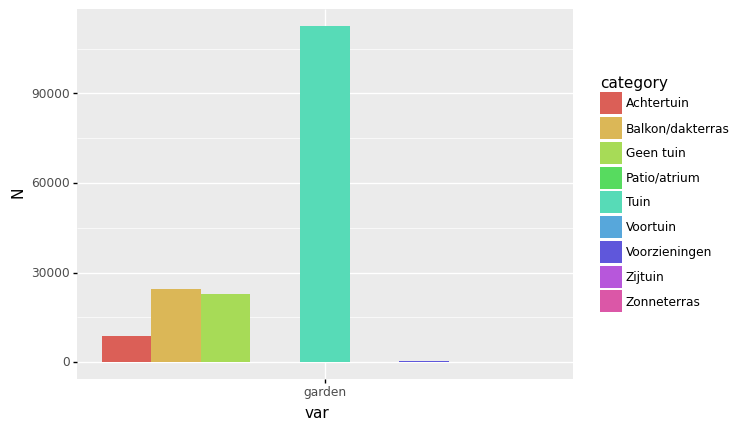

<ggplot: (130273086248)>

In [335]:
generate_freq_plot(generate_freq_table(df, ['garden']))

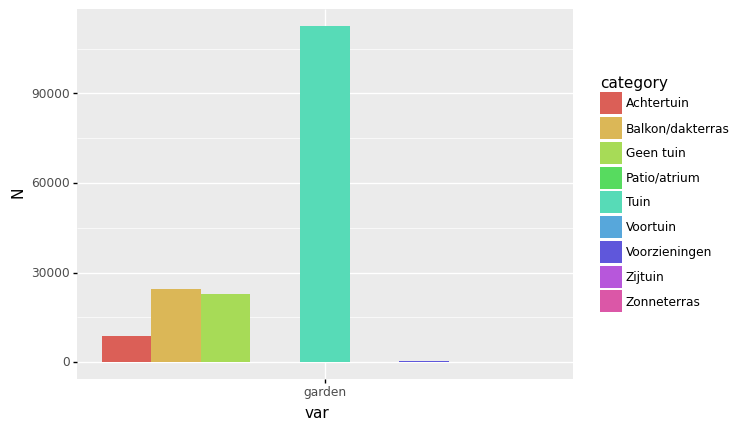

<ggplot: (130273088100)>

In [336]:
generate_freq_plot(generate_freq_table(df, ['garden']))

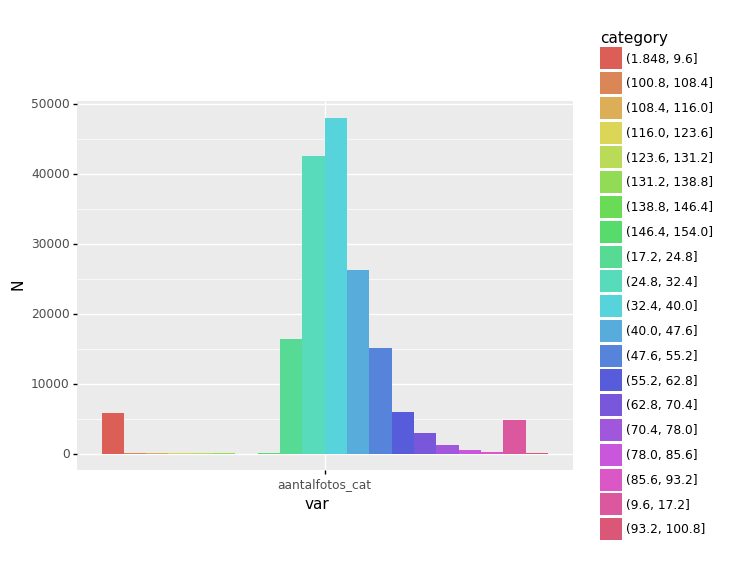

<ggplot: (130282475249)>

In [337]:
df = df.assign(aantalfotos_cat = pd.cut(df['aantalfotos'], 20))
generate_freq_plot(generate_freq_table(df, ['aantalfotos_cat']))

In [338]:
generate_freq_table(df, ['aantalfotos_cat'])

,category,N,var
0,"(1.848, 9.6]",5722,aantalfotos_cat
1,"(9.6, 17.2]",4842,aantalfotos_cat
2,"(17.2, 24.8]",16377,aantalfotos_cat
3,"(24.8, 32.4]",42439,aantalfotos_cat
4,"(32.4, 40.0]",48004,aantalfotos_cat
5,"(40.0, 47.6]",26277,aantalfotos_cat
6,"(47.6, 55.2]",15132,aantalfotos_cat
7,"(55.2, 62.8]",5862,aantalfotos_cat
8,"(62.8, 70.4]",2945,aantalfotos_cat
9,"(70.4, 78.0]",1193,aantalfotos_cat


- The age variable is quite right skewed. This is normal with this kind of variables. However, often transforming variables so that they follow more closely a normal distribution can help with the performance of the model. 

- This can be achieved by applying e.g. a log or square root transformation to the variable.

- More generally, one can use a box-cox transformation https://en.wikipedia.org/wiki/Power_transform from scipy.stats.boxcox to attempt to achieve a closer distribution to normality

This is particularly the case if the target to be predicted is continuous and very right skewed, as it's often the case with e.g. house prices. Then, transforming the target so that it follows more closely a normal distribution can have a positive impact on the performance of the model. In this case, one trains a model to predict e.g. the log of the target, and to generate the actual prediction one applies the inverse transformation. Let's see an example on the age variable.

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 281'. Pick better value with 'binwidth'.


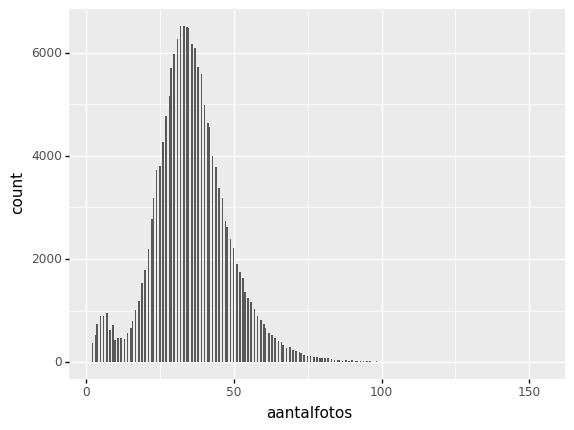

<ggplot: (130281505762)>

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 281'. Pick better value with 'binwidth'.


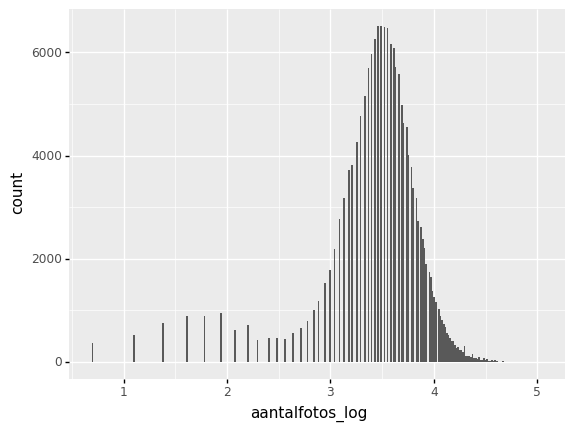

<ggplot: (130272559108)>

In [339]:
# first we look at what the log transformation does
(
    ggplot(df, aes(x='aantalfotos')) +
    geom_histogram()
)

(
    ggplot(df.assign(aantalfotos_log = lambda x: np.log(x.aantalfotos)), aes(x='aantalfotos_log')) +
    geom_histogram()
)

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 259'. Pick better value with 'binwidth'.


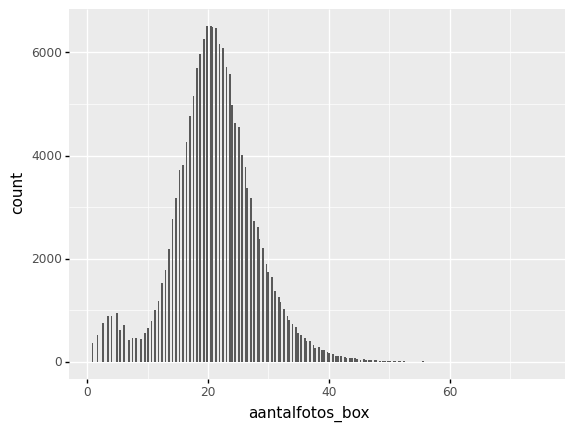

<ggplot: (130272686327)>

Here's how the inverse of the box-coxed transformed age looks:
[61. 46. 43. ... 49. 53. 55.]
Which is identical to the original value of age:
[61 46 43 ... 49 53 55]


In [340]:
# let's try a boxcox transform
# first we find the box-cox transforms of the age column
aantalfotos_boxed = scipy.stats.boxcox(df.aantalfotos) # returns a tuple with (1) vector of transformed values, (2) lambda value found by the optimizer. The lambda value specifies the exact closed-form of the transforming function
aantalfotos_boxed_v = aantalfotos_boxed[0] # the transformed values
aantalfotos_boxed_lambda = aantalfotos_boxed[1] # the lambda value found by the optimizer

# the age variable now looks closer to normal, although the gaps in the range show that this approach has limited 
# value for an inherently discrete variable like age. However, for continuous variables this can substantially improve the performance of 
# your model
(
    ggplot(df.assign(aantalfotos_box = aantalfotos_boxed_v), aes(x='aantalfotos_box')) +
    geom_histogram()
)

# we can then apply the inverse transform using box_cox_inv and passing in the lambda value. This will transform
# the box-coxed age back to the original vector
aantalfotos_boxed_inv = scipy.special.inv_boxcox(aantalfotos_boxed_v, aantalfotos_boxed_lambda)
print("Here's how the inverse of the box-coxed transformed age looks:")
print(aantalfotos_boxed_inv)
print("Which is identical to the original value of age:")
print(df.aantalfotos.to_numpy())

We can calculate a frequency table with pd.crosstab, in order to evaluate where in the covariate space the highest concentration of defaults occur, and which variables are likely to be good class separators (predictors).

In [341]:
def calculate_freq_table(df, variables):
    var_series = [df[i] for i in variables]
    freq_table = pd.crosstab(var_series, df['sell_time_cal'])
    freq_table = freq_table.assign(N_obs = freq_table.sum(axis=1))
    freq_table = freq_table.assign(p = freq_table[1]/freq_table.N_obs)
    percentage_table = freq_table[['N_obs','p']]
    percentage_table.columns.name = None
    percentage_table = percentage_table.reset_index()
    return freq_table, percentage_table

In [342]:
freq_table_garden_energy_label = calculate_freq_table(df, ['garden', 'energy_label'])

,garden,energy_label,N_obs,p
0,Achtertuin,A,1655,0.003625
1,Achtertuin,A+,18,0.000000
2,Achtertuin,A++,16,0.000000
3,Achtertuin,A+++,7,0.000000
4,Achtertuin,B,1199,0.001668
...,...,...,...,...
80,Zonneterras,C,31,0.000000
81,Zonneterras,D,14,0.000000
82,Zonneterras,E,22,0.000000
83,Zonneterras,F,14,0.000000


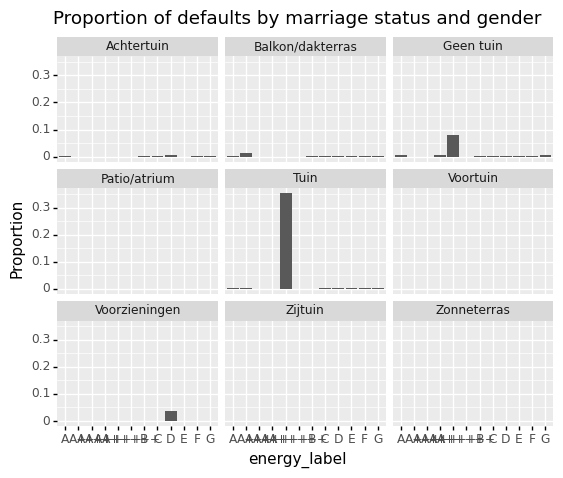

<ggplot: (130272642440)>

In [343]:
name_remapper.rename_columns(freq_table_garden_energy_label[1])

(
    ggplot(
    name_remapper.rename_columns(freq_table_garden_energy_label[1]), aes(x='energy_label', y='p')) + geom_bar(stat='identity', position='dodge')
    + facet_wrap('garden')
    + labs(y='Proportion')
    + ggtitle('Proportion of defaults by marriage status and gender')
)

looks like marriage category others_0 has lower default risk than the other categories.

In [344]:
name_remapper.rename_columns(calculate_freq_table(df, ['energy_label'])[1])

,energy_label,N_obs,p
0,A,36994,0.002514
1,A+,716,0.004190
2,A++,330,0.000000
3,A+++,426,0.002347
4,A++++,76,0.197368
5,A+++++,61,0.000000
6,B,24762,0.001413
7,C,43348,0.002007
8,D,19932,0.001806
9,E,15594,0.001924


It looks like males are more likely to default than females in this dataset. Is this statistically significant? Assuming that the sample of customers is a random sample and the observations are independent (which they are in this case), we could run a z-test of proportions to check if this difference is significant (https://online.stat.psu.edu/stat415/lesson/9/9.4).

In [345]:
(
    ggplot(name_remapper.rename_columns(calculate_freq_table(df, ['garden'])[1]),
    aes(x = 'education', y='p')
    ) + geom_bar(stat='identity')
    +  theme(axis_text_x=element_text(rotation=45, hjust=1))
)

PlotnineError: "Could not evaluate the 'x' mapping: 'education' (original error: name 'education' is not defined)"

Let's explore the payment delay information. Let's create a few more features:
- max delay that the user incurred in
- number of delays that the user incurred in

In [ ]:
max_delay = (credit_card_df[[x for x in credit_card_df.columns if x.startswith('pay_') and 'amt' not in x]]).max(axis=1)
credit_card_df['max_delay'] = max_delay
freq_delay = ((credit_card_df[[x for x in credit_card_df.columns if x.startswith('pay_') and 'amt' not in x]]) >= 0).sum(axis=1)
credit_card_df['freq_delay'] = freq_delay

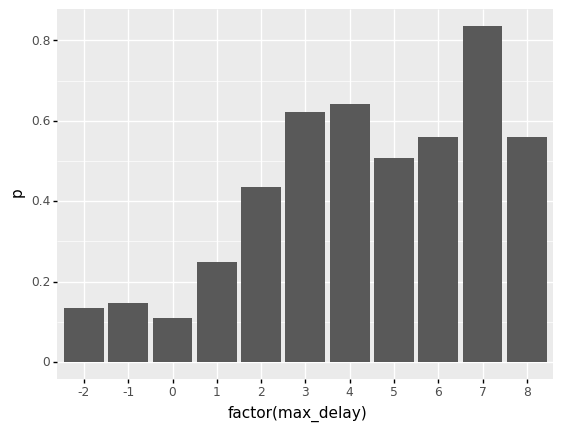

<ggplot: (130282383333)>

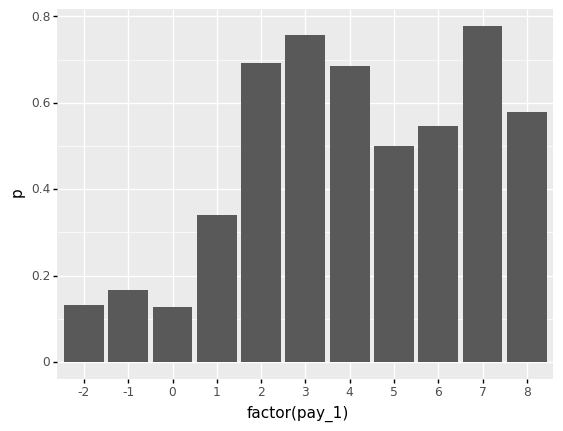

<ggplot: (130282432094)>

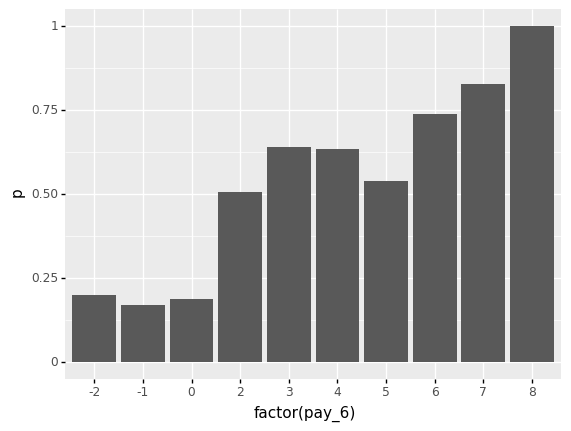

<ggplot: (130282472196)>

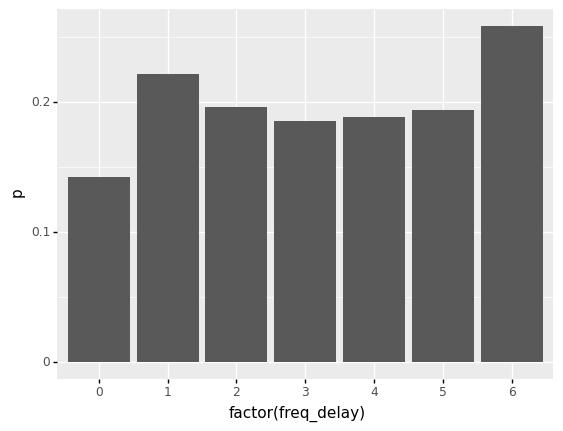

<ggplot: (130282673180)>

In [ ]:
(
    ggplot(calculate_freq_table(credit_card_df, ['max_delay'])[1], aes(x='factor(max_delay)', y='p')) +
    geom_bar(stat='identity')
)


(
    ggplot(calculate_freq_table(credit_card_df, ['pay_1'])[1], aes(x='factor(pay_1)', y='p')) +
    geom_bar(stat='identity')
)

(
    ggplot(calculate_freq_table(credit_card_df, ['pay_6'])[1], aes(x='factor(pay_6)', y='p')) +
    geom_bar(stat='identity')
)


(
    ggplot(calculate_freq_table(credit_card_df, ['freq_delay'])[1], aes(x='factor(freq_delay)', y='p')) +
    geom_bar(stat='identity')
)


C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.


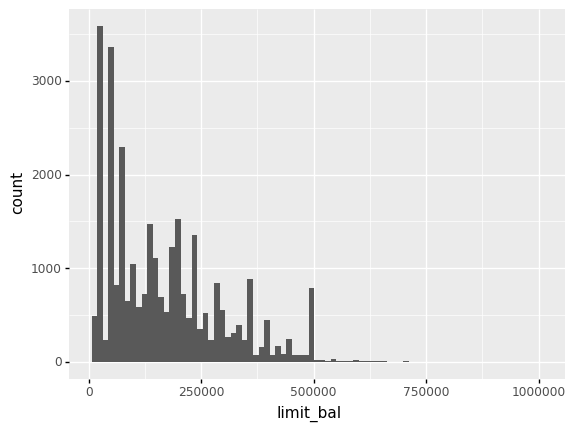

<ggplot: (130282397377)>

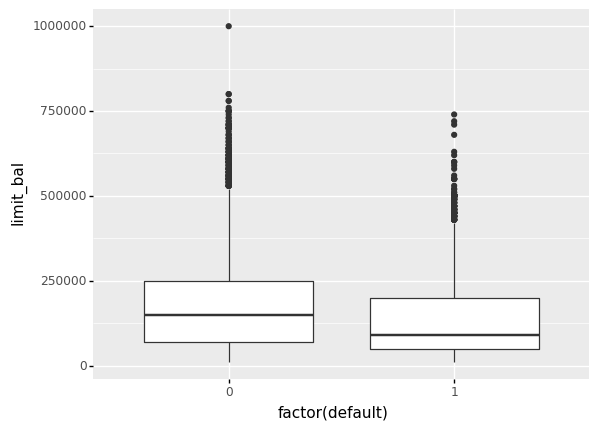

<ggplot: (130282476855)>

In [ ]:
# let's look at limit balance. Also very skewed.
(
    ggplot(credit_card_df, aes(x = 'limit_bal'))
    + geom_histogram()
)

# boxplot of limit balance vs default
(
    ggplot(credit_card_df)
    + geom_boxplot(aes(x='factor(default)', y='limit_bal'))
)

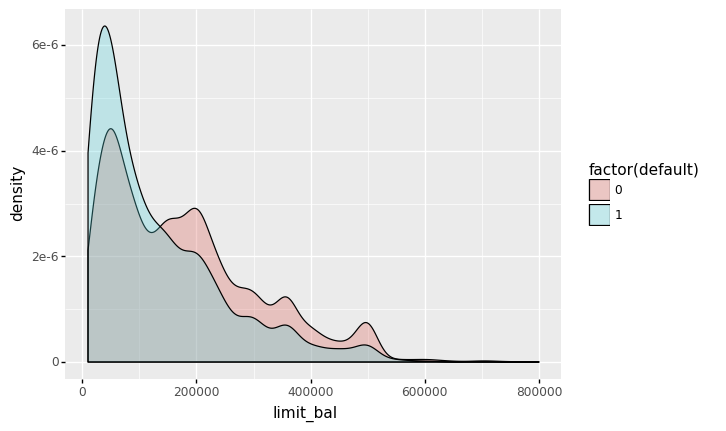

<ggplot: (130273308582)>

In [ ]:
# nicer: density plot of limit balance vs default
(
    ggplot(credit_card_df.sample(15000), aes(x='limit_bal', fill='factor(default)'))
    + geom_density(alpha=0.3)
)

C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:151: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\Eigenaar\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:154: PlotnineWarning: Groups with fewer than 2 data points have been removed.


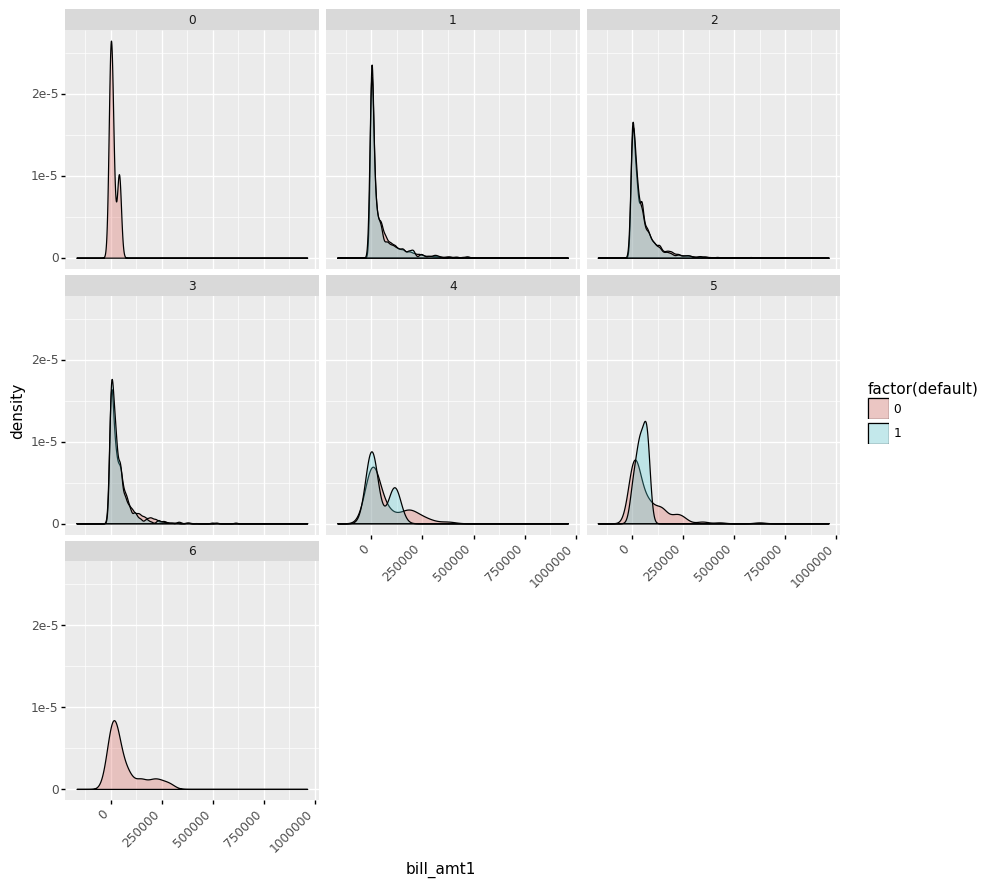

<ggplot: (130270866845)>

In [ ]:
(
    ggplot(credit_card_df.sample(15000), aes(x='bill_amt1', fill='factor(default)'))
    + geom_density(alpha=0.3)
    + facet_wrap('education')
    +  theme(axis_text_x=element_text(rotation=45, hjust=1))
     + theme(figure_size=(10, 10))  # here you define the plot size
)

We now save the dataset to disk that we will use for modelling

In [ ]:
credit_card_df = credit_card_df.drop(['age_cat'], axis=1)

We now write the dataset to disk for modelling.
There are various formats that can be used to store intermediate datasets for a ML pipeline: csv, pickle, feather, parquet...
We will use feather here.

In [ ]:
output_path = os.path.join('..', 'dataset', 'modelling_dataset.feather')
credit_card_df.reset_index().to_feather(output_path)

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.